# 

In [18]:
%matplotlib nbagg
#Import required libraries
from serial import Serial
import csv
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from drawnow import drawnow, figure
import os

In [19]:
#Functions
def initiate_reading(com,baud_rate):
    y=[]
    ser = Serial(com,baud_rate)
    return ser

def cls():
    os.system('cls' if os.name=='nt' else 'clear')

def animate(i,ser):
    b = ser.readline()# read a byte string
    string = b.decode('utf-8', errors='replace')   # decode byte string into Unicode  
    #string = string_n.rstrip() # remove \n and \r
    #if string=='' or not string.isnumeric():
        #string = '-1'
    flt = float(string)# convert string to float
    if flt !=-1:
        y.append(flt)# add to the end of data list

    print(flt)
    ax.clear()
    ax.plot(y)
    ax.set_ylabel(str(i))
        



In [24]:
#Just for collecting data
ser = initiate_reading('COM3',57600)
y=[]
    
try:
    while True:
        b = ser.readline()# read a byte string
        string = b.decode('utf-8', errors='replace')   # decode byte string into Unicode 
        string = string.rstrip() 
        #if string=='' or not string.isnumeric():
           # string = 4
        flt = float(string)# convert string to float
        y.append(flt)# add to the end of data list
        print(flt, end = "\r")

except KeyboardInterrupt:
    print("Press Ctrl-C to terminate while statement")
    pass

Press Ctrl-C to terminate while statement


In [78]:
len(y)

2152

#All  Sensor

RUN TEST FOR HIGH HEIGHT, MEDIUM HEIGHT, LOW HEIGHT

<IPython.core.display.Javascript object>


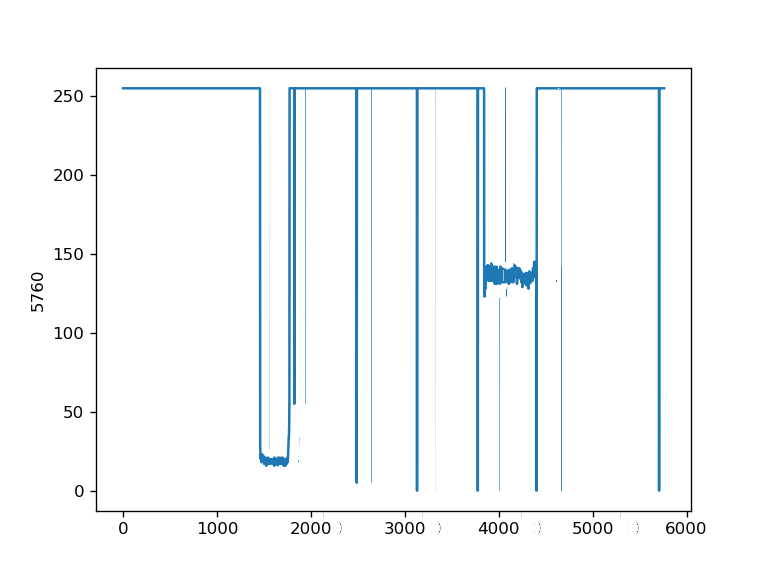

In [40]:
# Parameters
y=[]

#Initiate Reading
#lIGHT SENSOR BAUD
ser = initiate_reading('COM3',57600)

# set up animation
fig,ax = plt.subplots(1, 1)
anim = animation.FuncAnimation(fig, animate,fargs=(ser,),interval = 0.01,blit = True)
# plt.show()

In [23]:
#Close Connection
ser.close()

In [ ]:
fig,ax2 = plt.subplots(1, 1)
ax2.plot(y[500:1600])
#plt.show()

In [25]:
#Save this stuff
csv_name = r'\light_short_2.csv'
#csv_path =r'C:\Users\a_hop\repos\fydp-neofeed\sensor_data'+csv_name
csv_path = r'C:\Users\a_hop\repos\fydp-neofeed\sensor_data\2022-02-26 Height Cali and Light Sensor'+csv_name
with open(csv_path, 'w',newline="") as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows([[x] for x in y])

# END

In [ ]:
#Enhance graph to section we care about
i1 = 1050
i2 = 2500

fig,ax = plt.subplots(1, 1)
ax.plot(range(i1, i2, 1),y[i1:i2])
plt.show()

#Get Information
i1 = int(input("Enter first index:"))
i2 = int(input("enter second index:"))

slope = (y[i2]-y[i1])/(i2-i1)
peak_value = max(y[i1:i2])
print("Slope: "+str(slope))
print("Max: "+str(peak_value))

# LIGHT SENSOR

In [ ]:
# Parameters
y=[]

#Initiate Reading
ser = initiate_reading('COM5',115200)

# set up animation
fig,ax = plt.subplots(1, 1)
anim = animation.FuncAnimation(fig, animate,fargs=(ser,),interval = 25,blit = True)
plt.show()

In [ ]:
#Close Connection
ser.close()

In [ ]:
#Enhance graph to section we care about
i1 = int(input("Enter first index:"))
i2 = int(input("enter second index:"))

fig,ax = plt.subplots(1, 1)
ax.plot(range(i1, i2, 1),y[i1:i2])
plt.show()

In [ ]:
#Get Information
i1 = int(input("Enter first index:"))
i2 = int(input("enter second index:"))

slope = (y[i2]-y[i1])/(i2-i1)
peak_value = max(y[i1:i2])
print("Slope: "+str(slope))
print("Max: "+str(peak_value))

In [ ]:
#Save this stuff
csv_name = r'\light_avg.csv'
csv_path =r'C:\Users\a_hop\repos\fydp-neofeed\sensor_data\2022-02-26 Height Cali and Light Sensor'+csv_name

with open(csv_path, 'w',newline="") as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows([[x] for x in y])